# How do I get data into my notebook?

## Setting file path

In [1]:
# Before we start importing, we want to set up our path since it is very long and we don't want to have to 
# type it repeatedly.
from pathlib import Path

# Specify path, use 'r' before path to specify 'raw' path or Python will misread backslashes.
file_loc = Path(r'C:\Users\hruss\OneDrive\Documents\GMU\Repositories\Data_files')

# Check to see if path is legit
print(file_loc.is_dir())

True


## CSVs and Excel files

In [2]:
# Importing CSVs and Excel using Pandas
import pandas as pd

In [3]:
# First, we'll import a CSV.
df_csv = pd.read_csv(file_loc/"Movie_Actors.csv")
df_csv.head()

,Unnamed: 0,Actors,imdbID
0,0,Cass Barbera,tt2268369
1,2,Charles A. Post,tt0016750
2,3,Samuel Green,tt3405286
3,4,Surin Mendis,tt3816698
4,7,Baby Rube,tt0328410


In [4]:
# Then we'll import an Excel file
df_excel = pd.read_excel(file_loc/"Fortune1000.xlsx")
df_excel.head()

,Rank,Name,Revenue,revenue(% change),profits in millions,profits % change,assets,market value,change in rank in 1000,employees,change in rank(500 only),measure_up_rank
0,1,Walmart,559151.0,0.067,13510,-0.092,252496.0,382642.8,-,2300000,-,20
1,2,Amazon,386064.0,0.376,21331,0.841,321195.0,1558069.6,-,1298000,-,11
2,3,Apple,274515.0,0.055,57411,0.039,323888.0,2050665.9,1,147000,1,188
3,4,CVS Health,268706.0,0.046,7179,0.082,230715.0,98653.2,1,256500,1,57
4,5,UnitedHealth Group,257141.0,0.062,15403,0.113,197289.0,351725,2,330000,2,25


## PDF files to wordclouds

Here, we import four PDF files, read them, then create wordclouds from them

In [5]:
# Now let's bring in some text files
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import PyPDF2 as pyp
import numpy as np
import random

#Open PDFs so they can be read, 'rb' means read only in binary format
Lincoln_pdf = open(file_loc/'Address_Lincoln.pdf', 'rb')
Washington_pdf = open(file_loc/'Address_Washington.pdf', 'rb')
Reagan_pdf = open(file_loc/'Address_Reagan.pdf', 'rb')
JFK_pdf = open(file_loc/'Address_JFK.pdf', 'rb')

JFK_read_pdf = pyp.PdfFileReader(JFK_pdf)
Lincoln_read_pdf = pyp.PdfFileReader(Lincoln_pdf)
Washington_read_pdf = pyp.PdfFileReader(Washington_pdf)
Reagan_read_pdf = pyp.PdfFileReader(Reagan_pdf)
JFK_data = ""
Lincoln_data = ""
Washington_data = ""
Reagan_data = ""

Jnum_pages = JFK_read_pdf.numPages
for i in range(Jnum_pages) : 
        Jpage = JFK_read_pdf.getPage(i) 
        JFK_data = JFK_data + Jpage.extractText()
Lnum_pages = Lincoln_read_pdf.numPages
for i in range(Lnum_pages) : 
        Lpage = Lincoln_read_pdf.getPage(i)
        Lincoln_data = Lincoln_data + Lpage.extractText()
Wnum_pages = Washington_read_pdf.numPages
for i in range(Wnum_pages) : 
        Wpage = Washington_read_pdf.getPage(i)
        Washington_data = Washington_data + Wpage.extractText()
Rnum_pages = Reagan_read_pdf.numPages
for i in range(Rnum_pages) : 
        Rpage = Reagan_read_pdf.getPage(i)
        Reagan_data = Reagan_data + Rpage.extractText()

#Perform NLP on data to create more meaningful word clouds
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [Reagan_data, JFK_data, Washington_data, Lincoln_data]
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
data = df.transpose()

#Make sure you have these in the same order as your corpus above
data.columns = ['Reagan', 'JFK', 'Washington', 'Lincoln']
data.tail()

Xref table not zero-indexed. ID numbers for objects will be corrected.


,Reagan,JFK,Washington,Lincoln
written,0.017775,0.000000,0.000000,0.0
year,0.126124,0.059078,0.000000,0.0
yes,0.017775,0.000000,0.000000,0.0
young,0.028028,0.029539,0.000000,0.0
zens,0.000000,0.000000,0.040268,0.0


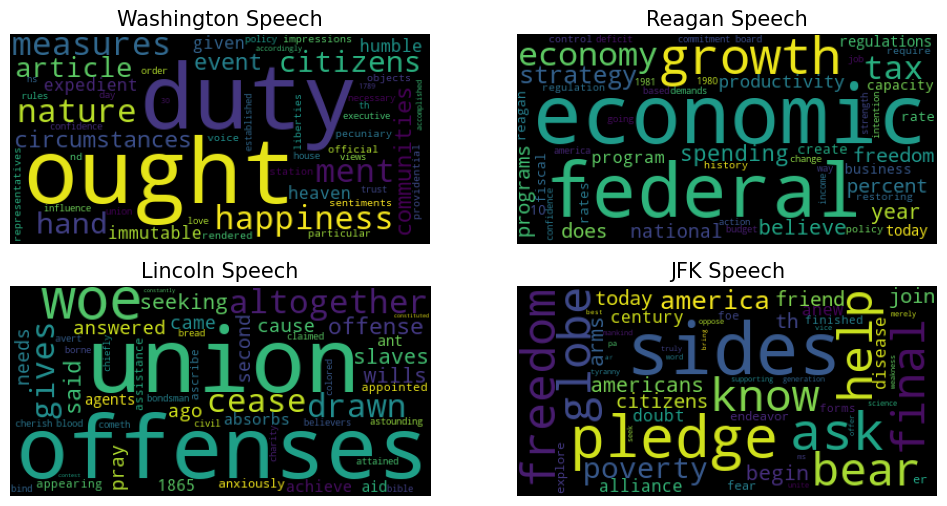

In [6]:
#Show wordclouds
colors = "viridis"
maxwords = 50

from matplotlib import pyplot as plt

# Set overall figure size
f = plt.figure(figsize=(12,6))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
Washington_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Washington'])
plt.imshow(Washington_wordcloud)
plt.axis('off')
plt.title('Washington Speech', fontsize=15)
# Subplot 2
plt.subplot(2, 2, 2)
Reagan_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Reagan'])
plt.imshow(Reagan_wordcloud)
plt.axis('off')
plt.title('Reagan Speech', fontsize=15)
# Subplot 3
plt.subplot(2, 2, 3)
Lincoln_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['Lincoln'])
plt.imshow(Lincoln_wordcloud)
plt.axis('off')
plt.title('Lincoln Speech', fontsize=15)
# Subplot 4
plt.subplot(2, 2, 4)
JFK_wordcloud = WordCloud(max_words = maxwords, colormap = colors).generate_from_frequencies(data['JFK'])
plt.imshow(JFK_wordcloud)
plt.axis('off')
plt.title('JFK Speech', fontsize=15);

## Images from Github repo

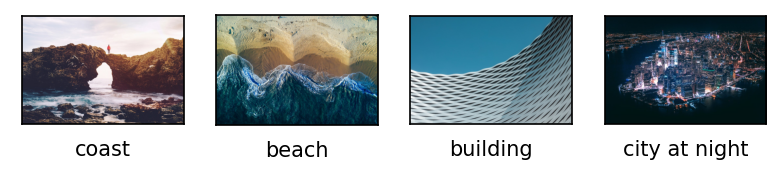

In [7]:
#Import libraries
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import PIL
import base64, io, IPython
from PIL import Image as Image
from urllib.request import urlopen

#Pull in files, create folder containing all four files
folder = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Visualization-Workshop/master/Datasets/images/'
files = ['photo-1.jpg', 'photo-2.jpg', 'photo-3.jpg', 'photo-4.jpg']        #How do we automatically iterate over all files in GitHub Folder?
imgs = [Image.open(urlopen(os.path.join(folder, file))) for file in files]

#Now, let's print them out to look at them
fig, axes = plt.subplots(1, 4) 
fig.dpi = 150
labels = ['coast', 'beach', 'building', 'city at night'] 
for i in range(len(imgs)): 
    axes[i].imshow(imgs[i]) 
    axes[i].set_xticks([]) 
    axes[i].set_yticks([]) 
    axes[i].set_xlabel(labels[i], color='black')
imgarr = np.array(imgs[i])



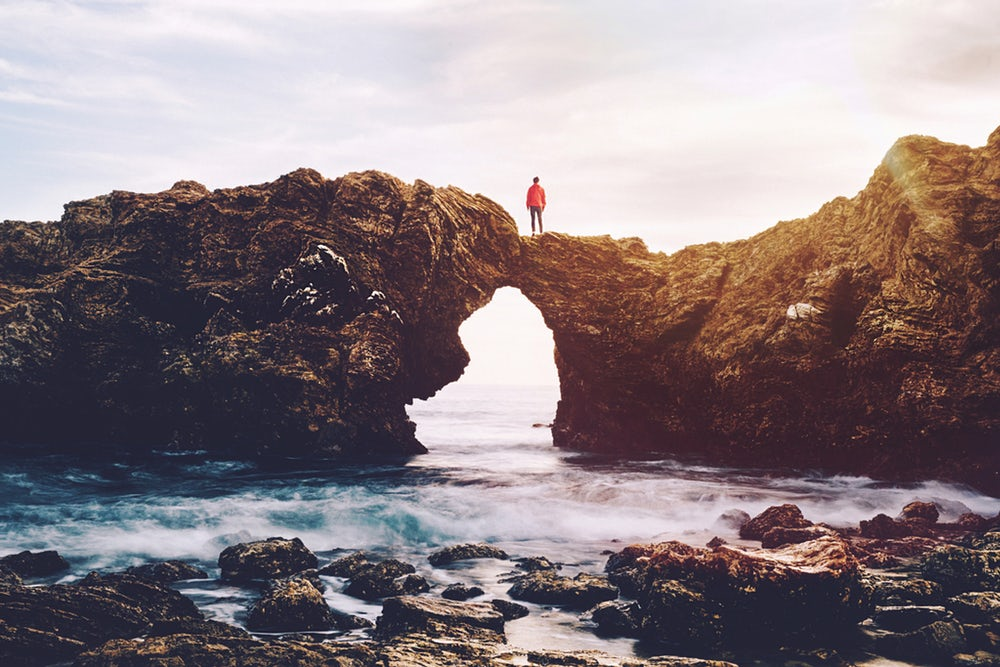

In [9]:
#Let's say we don't want to keep looking for the images on GitHub. We can embed them into our notebook forever...
html = []
for i in range(len(imgs)):
    output = io.BytesIO()
    imgs[i].save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html.append('<img src="data:image/png;base64,{}"/>'.format(encoded_string))
IPython.display.HTML(html[0])       # Change index from 0 to 1, 2 or 3 to see others

## Application Programming Interfaces

In [12]:
import requests

def get_country_data():
    # The endpoint URL for a hypothetical country data API
    api_url = f"https://restcountries.com/v3.1/all"

    # Send GET request
    response = requests.get(api_url)

    # Check if the request was successful
    if response.status_code == 200:
        return response.json()
    else:
        return f"Error: {response.status_code} - {response.text}"

data = get_country_data()
data_df = pd.DataFrame(data)
data_df


,name,tld,cca2,ccn3,cca3,cioc,independent,status,unMember,currencies,...,gini,fifa,car,timezones,continents,flags,coatOfArms,startOfWeek,capitalInfo,postalCode
0,"{'common': 'Mauritania', 'official': 'Islamic ...",[.mr],MR,478,MRT,MTN,True,officially-assigned,True,"{'MRU': {'name': 'Mauritanian ouguiya', 'symbo...",...,{'2014': 32.6},MTN,"{'signs': ['RIM'], 'side': 'right'}",[UTC],[Africa],"{'png': 'https://flagcdn.com/w320/mr.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [18.07, -15.97]}",NaN
1,"{'common': 'Eritrea', 'official': 'State of Er...",[.er],ER,232,ERI,ERI,True,officially-assigned,True,"{'ERN': {'name': 'Eritrean nakfa', 'symbol': '...",...,NaN,ERI,"{'signs': ['ER'], 'side': 'right'}",[UTC+03:00],[Africa],"{'png': 'https://flagcdn.com/w320/er.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [15.33, 38.93]}",NaN
2,"{'common': 'Puerto Rico', 'official': 'Commonw...",[.pr],PR,630,PRI,PUR,False,officially-assigned,False,"{'USD': {'name': 'United States dollar', 'symb...",...,NaN,PUR,"{'signs': ['USA'], 'side': 'right'}",[UTC-04:00],[North America],"{'png': 'https://flagcdn.com/w320/pr.png', 'sv...",{},monday,"{'latlng': [18.47, -66.12]}","{'format': '#####-####', 'regex': '^(\d{9})$'}"
3,"{'common': 'Romania', 'official': 'Romania', '...",[.ro],RO,642,ROU,ROU,True,officially-assigned,True,"{'RON': {'name': 'Romanian leu', 'symbol': 'le...",...,{'2018': 35.8},ROU,"{'signs': ['RO'], 'side': 'right'}",[UTC+02:00],[Europe],"{'png': 'https://flagcdn.com/w320/ro.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [44.43, 26.1]}","{'format': '######', 'regex': '^(\d{6})$'}"
4,"{'common': 'Antigua and Barbuda', 'official': ...",[.ag],AG,028,ATG,ANT,True,officially-assigned,True,"{'XCD': {'name': 'Eastern Caribbean dollar', '...",...,NaN,ATG,"{'signs': ['AG'], 'side': 'left'}",[UTC-04:00],[North America],"{'png': 'https://flagcdn.com/w320/ag.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [17.12, -61.85]}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,"{'common': 'Norfolk Island', 'official': 'Terr...",[.nf],NF,574,NFK,NaN,False,officially-assigned,False,"{'AUD': {'name': 'Australian dollar', 'symbol'...",...,NaN,NaN,"{'signs': ['AUS'], 'side': 'left'}",[UTC+11:30],[Oceania],"{'png': 'https://flagcdn.com/w320/nf.png', 'sv...",{},monday,"{'latlng': [-29.05, 167.97]}",NaN
246,"{'common': 'Lebanon', 'official': 'Lebanese Re...",[.lb],LB,422,LBN,LBN,True,officially-assigned,True,"{'LBP': {'name': 'Lebanese pound', 'symbol': '...",...,{'2011': 31.8},LBN,"{'signs': ['RL'], 'side': 'right'}",[UTC+02:00],[Asia],"{'png': 'https://flagcdn.com/w320/lb.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [33.87, 35.5]}","{'format': '#### ####|####', 'regex': '^(\d{4}..."
247,"{'common': 'Zambia', 'official': 'Republic of ...",[.zm],ZM,894,ZMB,ZAM,True,officially-assigned,True,"{'ZMW': {'name': 'Zambian kwacha', 'symbol': '...",...,{'2015': 57.1},ZAM,"{'signs': ['RNR'], 'side': 'left'}",[UTC+02:00],[Africa],"{'png': 'https://flagcdn.com/w320/zm.png', 'sv...",{'png': 'https://mainfacts.com/media/images/co...,monday,"{'latlng': [-15.42, 28.28]}","{'format': '#####', 'regex': '^(\d{5})$'}"
248,"{'common': 'Eswatini', 'official': 'Kingdom of...",[.sz],SZ,748,SWZ,SWZ,True,officially-assigned,True,"{'SZL': {'name': 'Swazi lilangeni', 'symbol': ...",...,{'2016': 54.6},SWZ,"{'signs': ['SD'], 'side': 'left'}",[UTC+02:00],[Africa],"{'png': 'https://flagcdn.com/w320/sz.png', 'sv...",{},monday,"{'latlng': [-26.32, 31.13]}","{'format': '@###', 'regex': '^([A-Z]\d{3})$'}"
